# Machine Learning & Deep Learning

L'objectif de ce TP est de manipuler des modèles basiques de Machine Learning et Deep Learning sur dataset fourni. Nous utiliserons pour cela le dataset `mpg` disponible dans Seaborn.

Le TP est divisé en deux parties : 
* Régression : L'objectif sera de prédire la masse d'une voiture en fonction de certaines features.
* Classification : L'objectif sera de prédire l'origine d'une voiture (usa, japan ou europe) en fonction de certaines features.

## Imports

In [1]:
# Ne pas effacer

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score, KFold


## Régression

### Régression linéaire simple

Dans cette partie, nous allons modéliser la masse d'une voiture en fonction du nombre de chevaux à partir du dataset `mpg` disponible dans Seaborn.

Chargez le dataset depuis Seaborn et  stockez-le dans la variable df dans ce notebook. Affichez les 5 premières lignes.

In [2]:
# Réponse
df=sns.load_dataset("mpg")
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[398 rows x 9 columns]

Vérifiez si votre dataset contient des valeurs manquantes. Si c'est le cas, supprimez-les de votre dataset.

In [3]:
# Réponse
print(f"Voici les valeurs manquantes :\n {df.isnull().sum()}")
df.dropna(inplace=True)

Voici les valeurs manquantes :
 mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


#### Définition des features X et de la target y

Le premier objectif est de prédire la masse (`weight`) en fonction du nombre de chevaux (`horsepower`).

Attribuez ces deux variables à X et y, où X représente la feature, et y représente la cible (target).

In [4]:
# Réponse
X = df[['horsepower']]
y = df['weight']


In [5]:
y

0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
393    2790
394    2130
395    2295
396    2625
397    2720
Name: weight, Length: 392, dtype: int64

👇 En utilisant `sns.scatterplot`, visualisez la relation entre `horsepower`et `weight`.

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

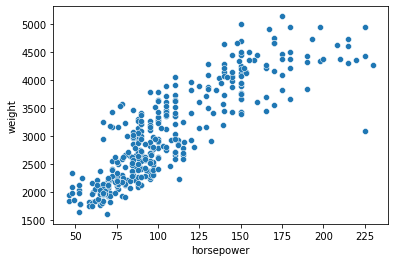

In [5]:
# Réponse
sns.scatterplot(data=df,x="horsepower",y="weight")

ℹ️ Le graphique devrait suggérer qu'il existe une relation linéaire. Mais s'agit-il d'une relation parfaitement linéaire ? C'est ce que nous allons découvrir.

#### Evaluation du modèle

Le modèle peut être évalué par cross validation ou par la méthode hold-out.

#### Evaluation par cross-Validation

En utilisant la fonction `cross_validate` de Sklearn, effectuez une validation croisée en 5 plis sur un modèle `LinearRegression()` destiné à prédire `weight` à partir de `horsepower`. Enregistrez le résultat de la validation croisée dans la variable `cv_results`.

In [6]:
#Réponse
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Séparer les caractéristiques (features) et la cible (target)
X = df[['horsepower']]  
y = df['weight']          

# Initialiser le modèle de régression linéaire
model = LinearRegression()

In [7]:
# Validation croisée avec cross_validate 
cv_results=cross_validate(model, X, y, cv=5)#par defaut il y a du shuffle, et le score de ce modele est en r2
#ou cross_val_score(model, X, y, cv=5) #pour avoir uniquement les scores

ℹ️ Lorsque vous effectuez une validation croisée, regardez toujours le score moyen : c'est l'évaluation la plus robuste et représentative de la performance du modèle. Affichez le score moyen de la validation croisée.

In [8]:
# Réponse
mean_score=cross_validate(model, X, y, cv=5)['test_score'].mean()
print(mean_score)

0.644177942838133


Pour chaque pli, quels sont les paramètres du modèle (coef et intercept) ?

In [9]:
# Réponse
cv_results = cross_validate(model, X, y, cv=5, return_estimator=True) #utiliser option return_estimator=True
print(f"Coefs : {[m.coef_[0] for m in cv_results['estimator']]}")
print(f"Intercepts : {[m.intercept_ for m in cv_results['estimator']]}")


Coefs : [20.926846631773508, 18.48644789726606, 18.694087381291254, 18.921593116389193, 18.959937338846863]
Intercepts : [839.351440478888, 1032.5577689823203, 992.2833272209377, 998.3261118698049, 1008.2089600788463]


#### Evaluation par la méthode hold-out

ℹ️ On aurait également pu calculer le score avec la méthode `train_test_split()`. Comparez le score moyen issu de la cross validation à un score réalisé avec le méthode `train_test_split()` avec un dataset de test correspondant à 80% des données totales.

In [10]:
# Réponse
# Create training data sets and holdout (testing) data sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the model
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.7978787513100347

Quels sont les paramètres du modèle (coef et intercept) ?

In [11]:
# Réponse
print(f"Coef : {model_2.coef_[0]}")
print(f"Intercept : {model_2.intercept_}")

Coef : 18.81118527121306
Intercept : 1018.5828006103093


#### Entraînement du modèle

Entraînez le modèle sur l'intégralité des données X et y.

In [13]:
# Réponse 

# Instantiate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X, y)

LinearRegression()

Stockez le coefficient du modèle dans la variable `coef`, et l'intercept (ordonnées à l'origine) dans la variable `intercept`.

In [14]:
# Réponse 

coef = model.coef_[0]
intercept = model.intercept_
print(coef, intercept)

19.078161552697466 984.500326770238


#### Visualisation graphique

Tracez dans un graphique `weight` en fonction de `horsepower` : affichez le train set, la régression linéaire et  le test set.

In [15]:
# Réponse

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
from sklearn.metrics import r2_score,mean_squared_error

def plot_overview_1_feature_linear_model(df,feature_name,target_name,test_size=0.2, random_state=42):
    '''
    # Examples of use : 
    df=sns.load_dataset("penguins")
    plot_overview_1_feature_linear_model(df,"flipper_length_mm","body_mass_g")
    # or 
    df=sns.load_dataset("iris")
    plot_overview_1_feature_linear_model(df,"sepal_length", »petal_length")
    '''

    # We clean dataset dropping na
    df=df[[feature_name,target_name]]
    df=df.dropna()
    
    nb_points=df.shape[0]
    
    X = df[[feature_name]]  
    y = df[target_name]   
    
    # Split data in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Fit the model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred = linear_model.predict(X_test)
    coef=linear_model.coef_[0]
    intercept=linear_model.intercept_
    
    # Créer la figure Plotly
    fig = go.Figure()

    # Ajouter les données de train du scatter plot
    fig.add_trace(go.Scatter(x=X_train.squeeze(), y=y_train,
                             mode='markers', name=f'<br>Train set : ({X_train.shape[0]} points of {nb_points})<br>',
                                 marker=dict(color='green')))
    

    # Ajouter la droite du modèle
    x_range = [X_train[feature_name].min(), X_train[feature_name].max()]
    y_range = [coef * x_range[0]+intercept, coef * x_range[1]+intercept ] 
    fig.add_trace(go.Scatter(x=x_range, y=y_range, mode='lines', 
                             name=f'''<br>Trained model :
                             <br>{target_name} = {coef:.2f} x {feature_name} + {intercept:.2f}
                             <br>Loss (mse)={mean_squared_error(y_train, linear_model.predict(X_train)):.2f}
                             <br>Score (r2)={r2_score(y_train, linear_model.predict(X_train)):.3f}<br>''',
                             line=dict(color='green', width=2)))

    # Ajouter les données de test du scatter plot
    fig.add_trace(go.Scatter(x=X_test.squeeze(), y=y_test,
                             mode='markers', name=f'<br>Test set ({X_test.shape[0]} points of {nb_points})<br>',
                                 marker=dict(color='blue')))
    
    # Ajouter les droites verticales pour représenter les écarts
    for i in range(len(X_test[feature_name])):
        x0=X_test[feature_name].iloc[i]
        y0=y_test.iloc[i]
        legendStatus=True if i==1 else False
        fig.add_trace(go.Scatter(x=[x0, x0], y=[y0, y_pred[i]],
                                 mode='lines', name=f'''<br>Difference between test set and trained model :
                                 <br>Score (r2)={r2_score(y_test,y_pred):.3f}<br>''',
                                 line=dict(color='red', width=1),showlegend=legendStatus))

    # Mise en forme du layout
    fig.update_layout(title='Overview of 1 feature linear regression',
                      xaxis_title=f"Feature : {feature_name}",
                      yaxis_title=f"Target : {target_name}",
                      showlegend=True,
                     )

    # Afficher la figure
    fig.show()

#df=sns.load_dataset("penguins")
plot_overview_1_feature_linear_model(df,"horsepower","weight")


Tracez dans un graphique 3D la loss (mse) en fonction du coef et de l'intercept entre entre -1e5 et 1e5. Vérifiez que les paramètres du modèle correspondent graphiquement au minimum de la loss.

In [16]:
# Réponse

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
from sklearn.metrics import r2_score,mean_squared_error

def plot_loss_1_feature_linear_model(df,feature_name,target_name,test_size=0.2, random_state=42):
    '''
    # Examples of use : 
    df=sns.load_dataset("penguins")
    plot_loss_1_feature_linear_model(df=df,feature_name="flipper_length_mm",target_name="body_mass_g")
    # or 
    df=sns.load_dataset("iris")
    plot_loss_1_feature_linear_model(df=df,feature_name="sepal_length",target_name="sepal_width")
    '''

    # Define the Mean Squared Error (MSE) function
    def mse_function(a, b, X_train, y_train,feature_name):
        xx = np.array(X_train[feature_name])
        yy = np.array(y_train)
        return np.mean(np.square(yy - (a * xx + b)))
    
    # We clean dataset dropping na
    df=df[[feature_name,target_name]]
    df=df.dropna()
    
    nb_points=df.shape[0]
    
    X = df[[feature_name]]  
    y = df[target_name]   
    
    # Split data in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Fit the model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred = linear_model.predict(X_test)
    coef=linear_model.coef_[0]
    intercept=linear_model.intercept_
    
    
    # Generate data for plotting
    a_values = np.linspace(-1e5, 1e5, 50)
    b_values = np.linspace(-1e5, 1e5, 50)
    A, B = np.meshgrid(a_values, b_values)
    Z = np.zeros_like(A)
    for i in range(len(a_values)):
        for j in range(len(b_values)):
            Z[j, i] = mse_function(A[j, i], B[j, i], X_train, y_train,feature_name)

    # Create a Plotly surface plot
    plotly_fig = go.Figure(data=go.Surface(z=Z, x=A, y=B))
    #model=model.fit(X_train,y_train)
    min_a=coef#model.coef_[0]
    min_b=intercept#model.intercept_
    min_loss=mse_function(min_a,min_b,X_train,y_train,feature_name)
    
    # Plot red dot for min loss
    plotly_fig.add_trace(go.Scatter3d(x=[min_a], y=[min_b], z=[min_loss],
                                      mode='markers', marker=dict(color='red', size=10)))

    # Format the layout
    plotly_fig.update_layout(
        title=f'''Surface plot of loss (Mean Squared Error : MSE)
        <br><span style="font-size:10px">Minimum loss : mse = {min_loss:.2f} (obtained for coef={min_a:.2f} and intercept={min_b:.2f})
        <br>Related model : {target_name} = {min_a:.2f} x {feature_name} + {min_b:.2f} </span>''',
        scene=dict(
            xaxis_title='Coef',
            yaxis_title='Intercept',
            zaxis_title='Loss (MSE)',
        ),
        showlegend=False,
    )

    # Show the interactive plot
    plotly_fig.show()
    

plot_loss_1_feature_linear_model(df=df,feature_name="horsepower",target_name="weight",test_size=0.2, random_state=42)    

#### Prediction

Utilisez votre modèle entraîné pour prédire la masse d'une voiture avec `horsepower=90`. Enregistrez la valeur prédite dans la variable `prediction`.

In [17]:
# Réponse
new_datapoint = pd.DataFrame({'horsepower': [90]})
# Make a prediction with the model
prediction = model.predict(new_datapoint)
prediction[0]

2701.53486651301

Vérifiez le résultat avec un calcul à la main en utilisant les paramètres du modèle : `.coef_` et `.intercept_`.

In [18]:
# Réponse
90*model.coef_[0]+model.intercept_

2701.53486651301

### Régression linéaire multivariée

Dans cette partie nous allons ajouter au modèle de régression linéaire précédent une autre feature afin d'améliorer le modèle. 

#### Définition des features X et de la target y

Commençons par sélectionner une feature qui semble corrélée avec `weight`. Pour cela, affichez les corrélations du dataset avec `sns.pairplot()`.

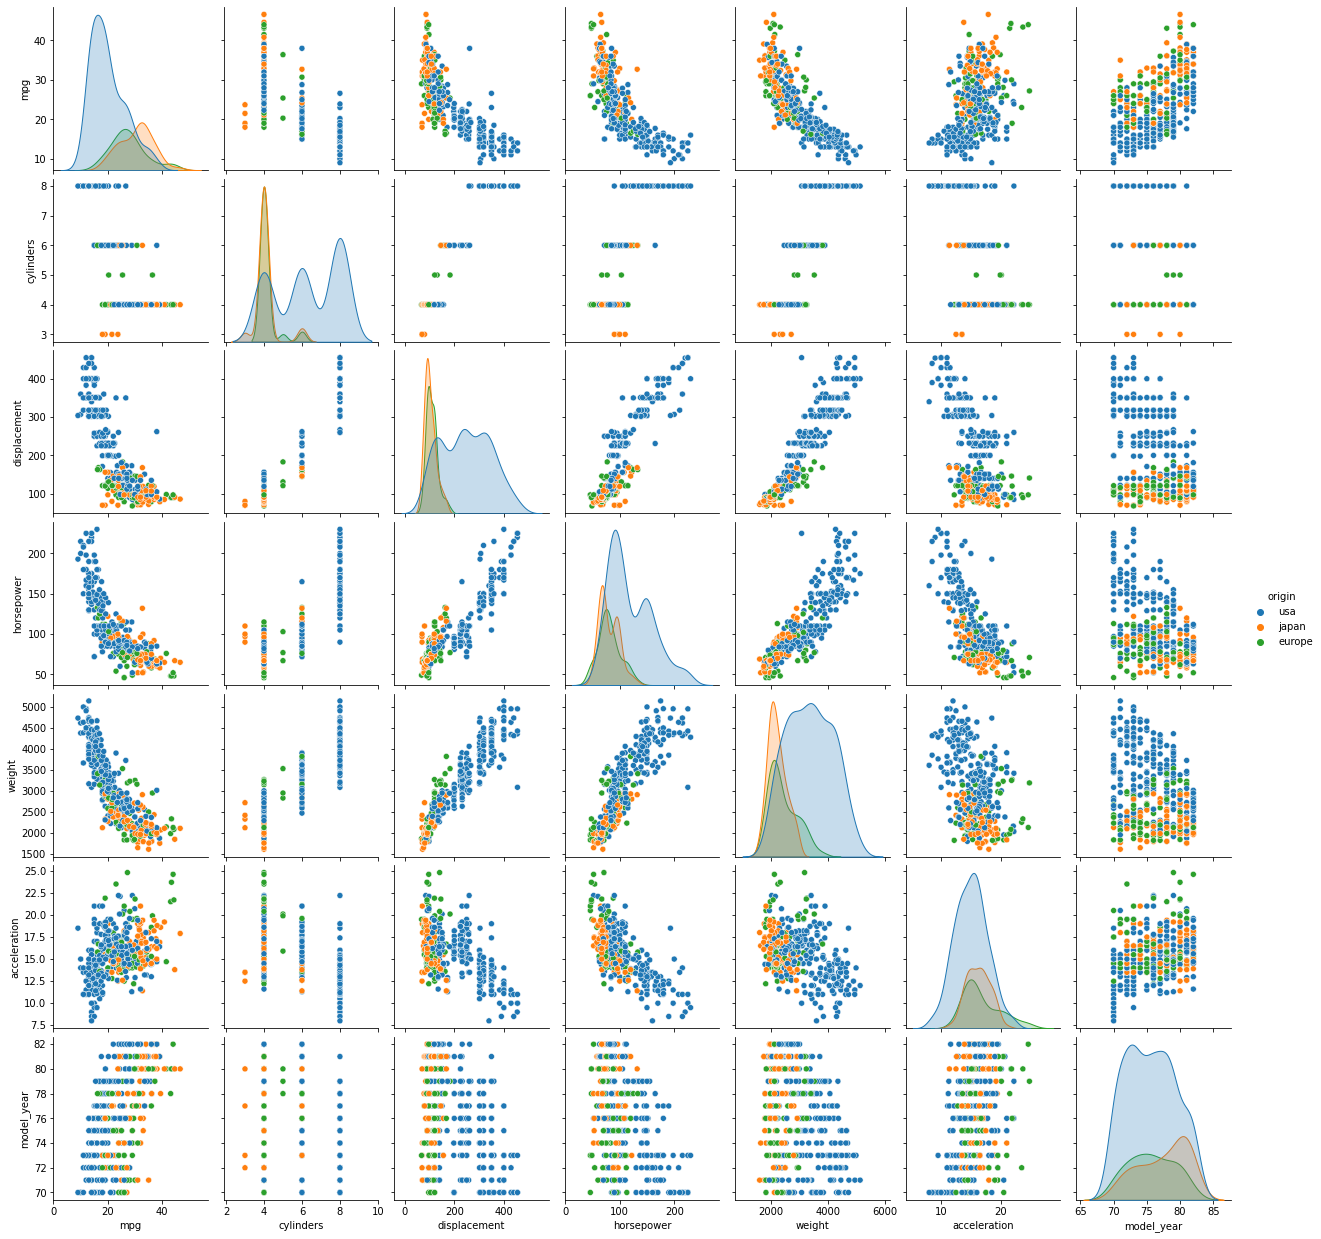

In [19]:
# Réponse
sns.pairplot(data=df,hue="origin")

Pour tenter d'améliorer le modèle nous allons sélectionner la feature `cylinders` en plus de la précédente feature `horsepower`.

Créez le dataset `X_2` avec les deux features `cylinders` et `horsepower`. 

In [20]:
# Réponse
X_2 = df[['horsepower','cylinders']]
X_2.head()

horsepower  cylinders
0       130.0          8
1       165.0          8
2       150.0          8
3       150.0          8
4       140.0          8

#### Cross validation

Calculez le score avec `cross_val_score` pour vérifier si cette nouvelle feature améliore les résultats du modèle.

In [21]:
# Réponse
model_2=LinearRegression()
cv_scores_2 = cross_val_score(model_2, X_2, y, cv=5,scoring='r2')
cv_scores_2.mean()

0.7661033743031702

#### Entraînement du nouveau modèle

Instanciez un nouveau modèle de régression linéaire appelé `model_2`, et entraînez-le.

In [22]:
#Réponse
model_2=LinearRegression()
model_2.fit(X_2,y)


LinearRegression()

Stockez les coefficients du modèle dans la variable `slope_2`, et l'intercept (ordonnées à l'origine) dans la variable `intercept_2`.

In [23]:
#Réponse
slope_2=model_2.coef_
slope_2

array([  8.23107048, 290.35642459])

In [24]:
model_2.intercept_

528.876711355812

#### Prédiction

Utilisez votre modèle entraîné pour prédire la masse d'une voiture avec `horsepower=90` et `cylinders=4`. Enregistrez la valeur prédite dans la variable `prediction_2`.

In [25]:
# Réponse
new_datapoint = pd.DataFrame.from_dict({'horsepower': [90],'cylinders':[4]})
# Make a prediction with the model
prediction_2 = model_2.predict(new_datapoint)
prediction_2[0]

2431.098753152007

Vérifiez le résultat avec un calcul à la main en utilisant `.coef_` et `.intercept_`.

In [26]:
# Réponse
90*model_2.coef_[0]+4*model_2.coef_[1]+model_2.intercept_

2431.098753152007

### Réseau de neurones dense (Deep Learning)

Réalisez un modèle Deep Learning de type réseau de neurones denses avec les features `horsepower`, `cylinders` et `acceleration` et la target `weight`. Vous utiliserez 3 hidden layers avec 32 neurones dans chaque couche avec des fonctions d'activation de type `relu`.

In [27]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Chargement du jeu de données
df = sns.load_dataset("mpg")

# Suppression des valeurs manquantes
df.dropna(inplace=True)

# Sélection des caractéristiques (features) et de la cible (target)
X = df[['horsepower', 'cylinders','acceleration']]
y = df['weight']

# Normalisation des données
#scaler = StandardScaler()
#X_normalized = scaler.fit_transform(X)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear') # Couche de sortie avec une seule unité pour la régression et activation linéaire
])


# Compilation du modèle avec la métrique R²
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer le coefficient de détermination R²
r2 = r2_score(y_test, y_pred)

print("R² sur l'ensemble de test :", r2)


2024-11-12 12:08:06.149564: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-12 12:08:06.152532: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-12 12:08:06.153424: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


2024-11-12 12:08:06.424073: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2024-11-12 12:08:06.717907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 1s 18ms/step - loss: 9498158.0000 - val_loss: 7797952.0000
Epoch 2/50
 8/32 [======>.......................] - ETA: 0s - loss: 9250468.0000

2024-11-12 12:08:07.535531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 10ms/step - loss: 8024568.5000 - val_loss: 5466104.5000
Epoch 3/50
32/32 [==============================] - 0s 9ms/step - loss: 3595661.2500 - val_loss: 744277.2500
Epoch 4/50
32/32 [==============================] - 0s 9ms/step - loss: 306971.7188 - val_loss: 279363.8438
Epoch 5/50
32/32 [==============================] - 0s 8ms/step - loss: 239919.0938 - val_loss: 267796.4375
Epoch 6/50
32/32 [==============================] - 0s 9ms/step - loss: 230068.7656 - val_loss: 264718.7188
Epoch 7/50
32/32 [==============================] - 0s 9ms/step - loss: 224822.0938 - val_loss: 259372.7969
Epoch 8/50
32/32 [==============================] - 0s 9ms/step - loss: 225946.7031 - val_loss: 254925.5625
Epoch 9/50
32/32 [==============================] - 0s 9ms/step - loss: 219491.2969 - val_loss: 252676.1719
Epoch 10/50
32/32 [==============================] - 0s 9ms/step - loss: 213970.3906 - val_loss: 255424.6875
Epoch 11/50
32/32 [===============

2024-11-12 12:08:22.762016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [28]:
r2_score(y_train, model.predict(X_train))


0.7866268830070055

## Classification

### Régression logistique simple

L'objectif est de prédire l'origine du véhicule `origin` en fonction de la feature `weight`. 

1. Créez le dataframe `X` de la feature, et la série `y` de la target.
2. Divisez vos données avec la méthode hold_hout.
3. Instanciez un modèle de régression logistique `LogisticRegression`, et entraînez-le.
4. Evaluez l'accuracy du modèle sur les données de test.
5. Réalisez une prédiction pour un véhicule de  `weight=3400`.



Vous essaierez ensuite d'apporter des éléments de réponse aux questions suivantes :
* Est-ce que le modèle est capable de faire mieux qu'une prédiction de la classe majoritaire ?

In [29]:
# Réponse

df
X=df[["weight"]]
y=df["origin"]
#y = y.map({"usa":1,"japan":2,"europe":3})

# Train model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.05,random_state=42)

model_logreg=LogisticRegression()
model_logreg.fit(X_train,y_train)
model_logreg.coef_
model_logreg.intercept_
print(f"Score (Accuracy) : {model_logreg.score(X_test,y_test)}")

# Prediction pour un nouveau point
new_point=pd.DataFrame({"weight":[3500]})
print(f"Prediction sur nouveau point : {model_logreg.predict(new_point)}")
print(f"Probabilités d'appartenance aux classes : {model_logreg.predict_proba(new_point)}")
print(f"Classes :{model_logreg.classes_}")

# Prediction par classe majoritaire
# df.groupby('origin').count()[['name']] or df[["origin"]].value_counts().max()/df[["origin"]].value_counts().sum()
print(f"Score par classe majoritaire : {245/(245+79+68)}")

Score (Accuracy) : 0.6
Prediction sur nouveau point : ['usa']
Probabilités d'appartenance aux classes : [[0.04169792 0.02407636 0.93422571]]
Classes :['europe' 'japan' 'usa']
Score par classe majoritaire : 0.625


### Regression logistique multivariée

L'objectif est de prédire l'origine du véhicule `origin` en fonction des features `weight` et `displacement`. 

1. Créez le dataframe `X` de la feature, et la série `y` de la target.
2. Divisez vos données avec la méthode hold_hout.
3. Instanciez un modèle de régression logistique `LogisticRegression`, et entraînez-le.
4. Evaluez l'accuracy du modèle sur les données de test.
5. Réalisez une prédiction pour un véhicule de  `weight=3400` et `displacement=320`.



Vous essaierez ensuite d'apporter des éléments de réponse aux questions suivantes :
1. Est-ce que l'ajout de la feature `displacement` améliore la performance du modèle ?
2. Est-ce que le modèle est capable de faire mieux qu'une prédiction de la classe majoritaire ?

In [30]:
# Réponse

df
X=df[["weight","displacement"]]
y=df["origin"]
#y = y.map({"usa":1,"japan":2,"europe":3})

# Train model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.05,random_state=1)
model_logreg2=LogisticRegression()
model_logreg2.fit(X_train,y_train)
model_logreg2.coef_
model_logreg2.intercept_
print(f"Score (Accuracy) : {model_logreg2.score(X_test,y_test)}")

# Prediction pour un nouveau point
new_point=pd.DataFrame({"weight":[3500],"displacement":[320]})
print(f"Prediction sur nouveau point : {model_logreg2.predict(new_point)}")
print(f"Probabilités d'appartenance aux classes : {model_logreg2.predict_proba(new_point)}")
print(f"Classes :{model_logreg2.classes_}")

# Prediction par classe majoritaire
# df.groupby('origin').count()[['name']]
print(f"Score par classe majoritaire : {245/(245+79+68)}")

Score (Accuracy) : 0.710455764075067
Prediction sur nouveau point : ['usa']
Probabilités d'appartenance aux classes : [[5.30331754e-11 8.61304238e-06 9.99991387e-01]]
Classes :['europe' 'japan' 'usa']
Score par classe majoritaire : 0.625


### K-Nearest Neighbor (KNN)

L'objectif est de prédire l'origine du véhicule `origin` en fonction des features `weight`, `displacement`et `cylinders`. 

1. Créez le dataframe `X` des features, et la série `y` de la target.
2. Divisez vos données avec la méthode hold_hout.
3. Instanciez un modèle de régression logistique `KNeighborsRegressor`, et entraînez-le avec 30 voisins.
4. Evaluez l'accuracy du modèle sur les données de test.
5. Réalisez une prédiction pour un véhicule de  `weight=3400` , `displacement=310` et `cylinders=8`.



Vous essaierez ensuite d'apporter des éléments de réponse aux questions suivantes :
* Est-ce que le modèle est capable de faire mieux qu'une prédiction de la classe majoritaire ?

In [32]:
# Réponse

# Imports
import seaborn as sns
import pandas as pd
import numpy as np

df=sns.load_dataset("mpg")
X=df[["weight","displacement","cylinders"]]
y=df["origin"]

# Train model

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=KNeighborsClassifier(n_neighbors=30)
model.fit(X_train,y_train)
print(f"Score (Accuracy) : {model.score(X_test,y_test)}")

# Prediction pour un nouveau point
new_point=pd.DataFrame({"weight":[3500],"displacement":[320],"cylinders":[4]})
print(f"Prediction sur nouveau point : {model.predict(new_point)}")
print(f"Probabilités d'appartenance aux classes : {model.predict_proba(new_point)}")
print(f"Classes :{model.classes_}")

# Prediction par classe majoritaire
# df.groupby('origin').count()[['name']]
print(f"Score par classe majoritaire : {245/(245+79+68)}")

Score (Accuracy) : 0.75
Prediction sur nouveau point : ['usa']
Probabilités d'appartenance aux classes : [[0.03333333 0.         0.96666667]]
Classes :['europe' 'japan' 'usa']
Score par classe majoritaire : 0.625
